<a href="https://colab.research.google.com/github/jazima2004/gdp-dashboard/blob/main/eda_netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Necessary Libraries
from ast import increment_lineno
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
sn.set(color_codes=True)


In [24]:
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
#Displaying top 10 rows
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [25]:
#Displaying last 5 rows
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [26]:
df.dtypes
#Checking if any data typeis string ,if it is string need to convert into integer for plot.

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [27]:
#Converting the type variable into binary here, 0 means movie 1 represents Tv show
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['show_type']=le.fit_transform(df['type'])
df.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,show_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1


In [28]:
#Dropping irrelevant columns
df=df.drop(['type','title','description'],axis=1)
df.head(2)

,show_id,director,cast,country,date_added,release_year,rating,duration,listed_in,show_type
0,s1,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,0
1,s2,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1


In [38]:
df=df.rename(columns={'show_type':'Type','cast':'Actors_cast','show_id':'Id',});
df.head(2)

,Id,director,Actors_cast,country,date_added,release_year,rating,duration,listed_in,Type
0,s1,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,0
1,s2,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",1


In [45]:
##df['date_added']=df['date_added'].strip()
df['date_added']=pd.to_datetime(df['date_added'])


In [46]:
df.shape

(8807, 10)

In [47]:
delete_duplicate=df[df.duplicated()]
delete_duplicate.shape #It has no duplicate rows

(0, 10)

In [48]:
df.count()  #Used to count no of rows in column

,0
Id,8807
director,6173
Actors_cast,7982
country,7976
date_added,8797
release_year,8807
rating,8803
duration,8804
listed_in,8807
Type,8807


In [49]:
#Dropping the missing or null values
df.isnull().sum() #Counting the null values in each column

,0
Id,0
director,2634
Actors_cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0
Type,0


In [53]:
#Dropping null values
df=df.dropna()


,Id,director,Actors_cast,country,date_added,release_year,rating,duration,listed_in,Type
7,s8,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",0
8,s9,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",1
9,s10,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",0
12,s13,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,"Dramas, International Movies",0
24,s25,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166,"Comedies, International Movies, Romantic Movies",0
...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,"Dramas, International Movies, Thrillers",0
8802,s8803,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers",0
8804,s8805,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",0
8805,s8806,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies",0


In [59]:
#After removing nan or null values
df.count()
df.isna().sum()

,0
Id,0
director,0
Actors_cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0
Type,0


<Axes: ylabel='release_year'>

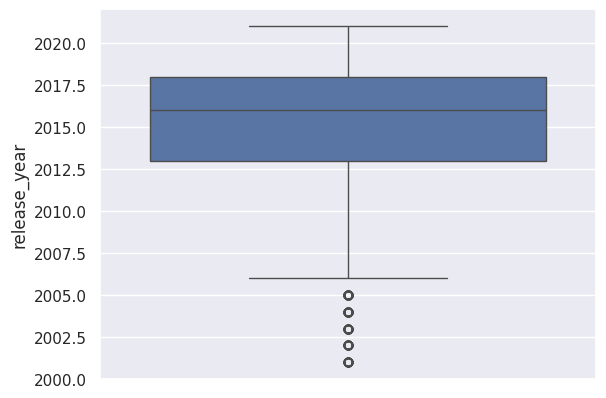

In [79]:
#Detecting outliers
sn.boxplot(df['release_year'])

<Axes: ylabel='duration'>

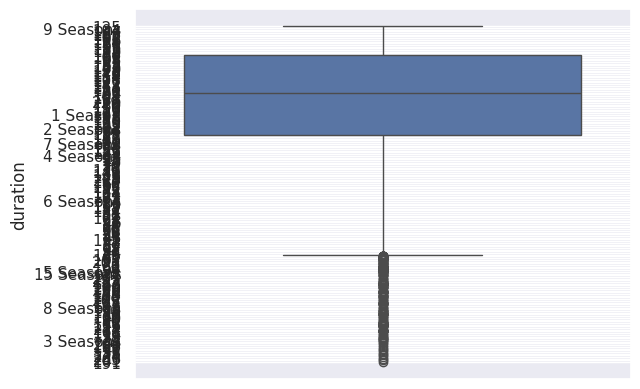

In [61]:
sn.boxplot(df['duration'])

In [68]:
q1=df['release_year'].quantile(0.25)
q3=df['release_year'].quantile(0.75)
iqr=q3-q1
iqr

np.float64(7.0)

In [74]:
# Applying the outlier filtering only to the 'release_year' column
# We create a boolean mask based on the outlier condition in 'release_year'
outlier_mask = (df['release_year'] < (q1 - 1.5 * iqr)) | (df['release_year'] > (q3 + 1.5 * iqr))

# We then filter the DataFrame using the inverse of the outlier mask
df = df[~outlier_mask]

df.shape

(4859, 10)

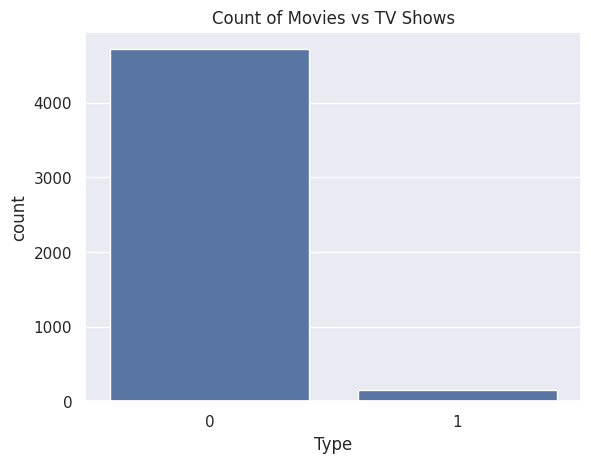

In [77]:

sn.countplot(data=df, x='Type')
plt.title('Count of Movies vs TV Shows')
plt.show()


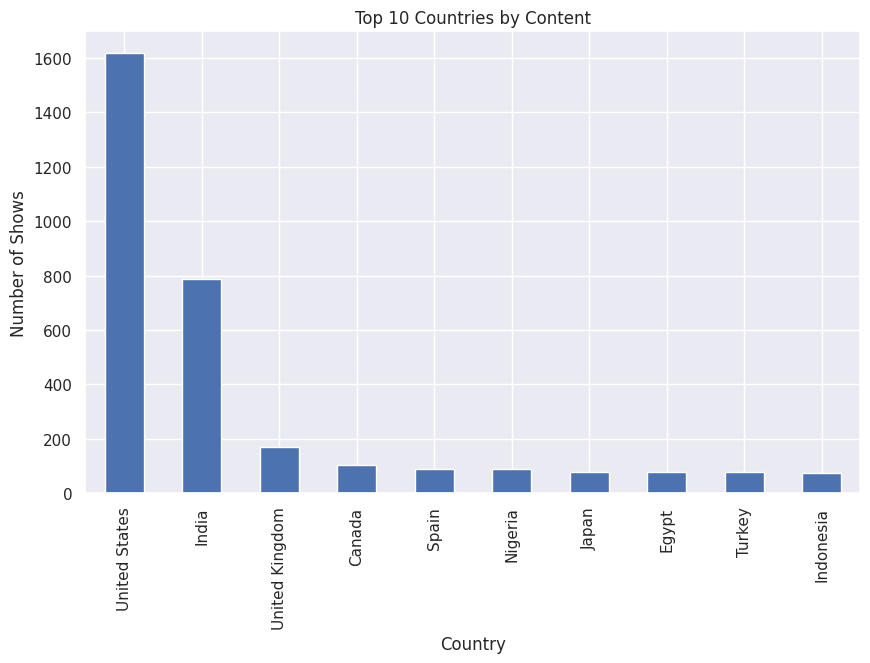

In [80]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='bar', figsize=(10, 6), title='Top 10 Countries by Content')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.show()


<ipython-input-81-44f634ac35e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'])
<ipython-input-81-44f634ac35e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year


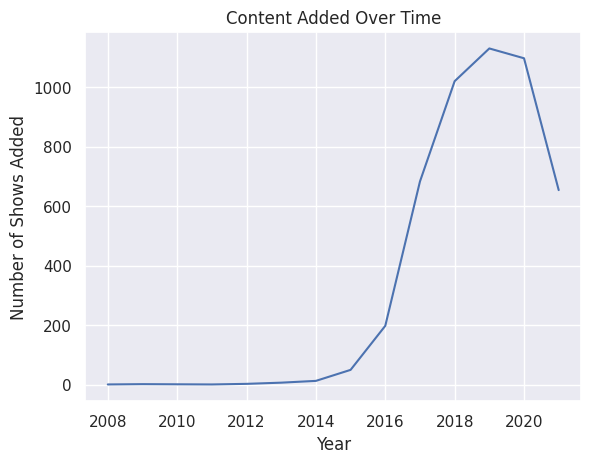

In [81]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='line', title='Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.show()


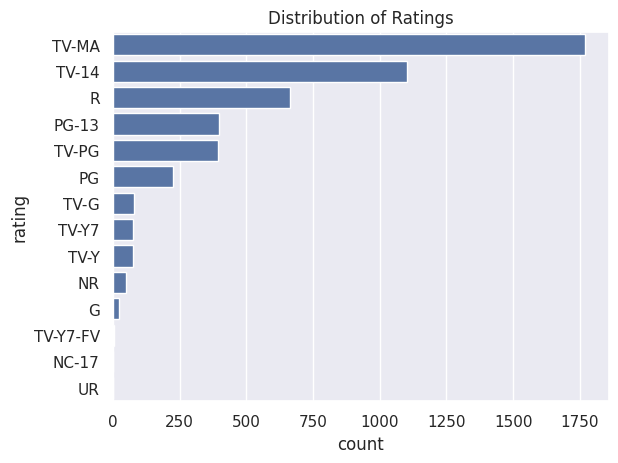

In [82]:
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()
